In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv('input_data.csv')
y=pd.read_csv('output_data.csv')

X=X.drop(['last_up','last_down','last_right','last_left'],axis=1)
X.shape, y.shape
# X=X.drop(['food_up','food_down','food_left','food_right','dist_to_right_wall','dist_to_top_wall'],axis=1)
print(len(X.columns))
print(len(X))
X.head()

16
48419


,food_up,food_down,food_left,food_right,dist_x_to_body,dist_y_to_body,dist_to_top_wall,dist_to_down_wall,dist_to_left_wall,dist_to_right_wall,Pear_center_x,Pear_center_y,Pear_to_top,Pear_to_bottom,Pear_to_right,Pear_to_left
0,0,0,0,1,0,0,400,400,400,400,792,48,752,48,8,792
1,0,0,0,1,0,0,400,400,408,392,792,48,752,48,8,792
2,0,0,0,1,0,0,400,400,416,384,792,48,752,48,8,792
3,0,0,0,1,0,0,400,400,424,376,792,48,752,48,8,792
4,0,0,0,1,0,0,400,400,432,368,792,48,752,48,8,792


In [3]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((43577, 16), (4842, 16), (43577, 4), (4842, 4))

Epoch 1/2000
1362/1362 [==============================] - 3s 1ms/step - loss: 0.5046 - accuracy: 0.4917
Epoch 2/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.4462 - accuracy: 0.6026
Epoch 3/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.4092 - accuracy: 0.6477
Epoch 4/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.6960
Epoch 5/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.7379
Epoch 6/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.3097 - accuracy: 0.7631
Epoch 7/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.2885 - accuracy: 0.7815
Epoch 8/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.7939
Epoch 9/2000
1362/1362 [==============================] - 2s 1ms/step - loss: 0.2593 - accuracy: 0.8028
Epoch 10/2000
1362/1362 [==============================] - 2s 1m

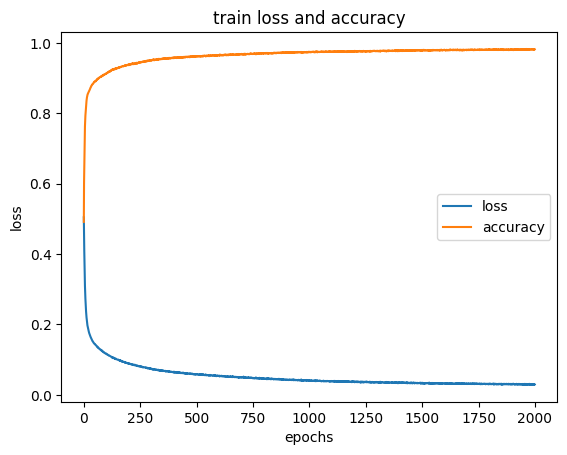

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),  #  input layer
  tf.keras.layers.Dense(80, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(48, activation=tf.keras.activations.sigmoid), 
  tf.keras.layers.Dense(4, activation='softmax')     # output layer
])


model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])



output=model.fit(X_train, Y_train, epochs=2000)
loss,accuracy=model.evaluate(X_test, Y_test)
model.save("MLP_FOR_Snake.h5")
print(f'loss: {loss}, accuracy: {accuracy}')

plt.plot(output.history["loss"],label='loss')
plt.plot(output.history["accuracy"],label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
